In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.multivariate_normal

<function RandomState.multivariate_normal>

In [3]:
mean_1 = np.array([1, 0.5])
cov_1 = np.array([[1, 0.1], [0.1, 0.2]])

mean_2 = np.array([4, 5])
cov_2 = np.array([[1.2, 0.1], [0.1, 1.3]])

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, 500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 500)

In [5]:
print(dist_1.shape, dist_2.shape)

(500, 2) (500, 2)


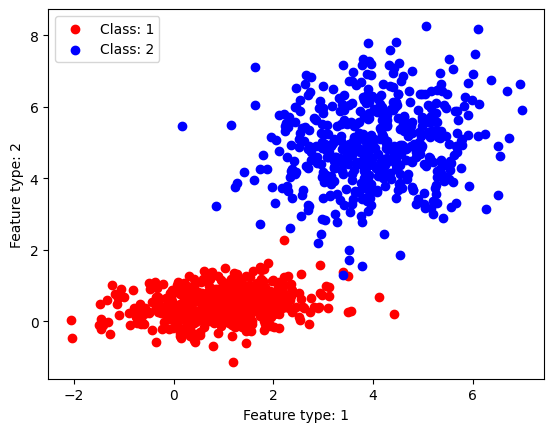

In [6]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], color = 'red', label = 'Class: 1')
plt.scatter(dist_2[:, 0], dist_2[:, 1], color = 'blue', label = 'Class: 2')
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.legend()
plt.show()

In [12]:
dataset = np.zeros((1000, 3))
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2

dataset[500:, -1] = 1
print(dataset[: 10])
print(dataset[: -10])

[[ 1.55783014 -0.27400075  0.        ]
 [ 0.88054993  0.13093137  0.        ]
 [ 0.22956635  0.26306338  0.        ]
 [ 1.11994805  0.46136972  0.        ]
 [ 1.21012706  1.35761732  0.        ]
 [ 0.94169365 -0.12636486  0.        ]
 [-0.73342211  0.25783379  0.        ]
 [ 2.00245856  0.20539414  0.        ]
 [-0.31621751  0.2730234   0.        ]
 [ 0.37457215  0.6871899   0.        ]]
[[ 1.55783014 -0.27400075  0.        ]
 [ 0.88054993  0.13093137  0.        ]
 [ 0.22956635  0.26306338  0.        ]
 ...
 [ 5.09426441  5.57352545  1.        ]
 [ 5.26376154  6.09539712  1.        ]
 [ 2.17743346  3.7408773   1.        ]]


In [13]:
np.random.shuffle(dataset)

In [14]:
print(dataset[: 10])

[[3.46100109 3.71582201 1.        ]
 [1.30998454 0.30109641 0.        ]
 [1.94600006 0.56347701 0.        ]
 [2.24964948 0.47207778 0.        ]
 [1.41825992 0.60969613 0.        ]
 [6.09841018 5.19039111 1.        ]
 [4.90140071 3.41343544 1.        ]
 [3.38170537 4.8307887  1.        ]
 [1.26659539 0.40417281 0.        ]
 [3.65280551 5.52284279 1.        ]]


In [15]:
X_train = dataset[:800, :-1]
X_test = dataset[800:, :-1]

Y_train = dataset[:800, -1]
Y_test = dataset[800:, -1]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(800, 2) (800,) (200, 2) (200,)


In [16]:
Y_test

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

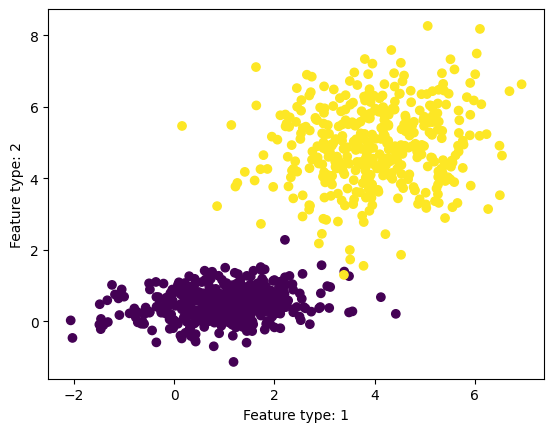

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [18]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
print(mean, std)

[2.46737735 2.66750181] [1.83486535 2.3822596 ]


In [19]:
X_train = (X_train - mean)/std

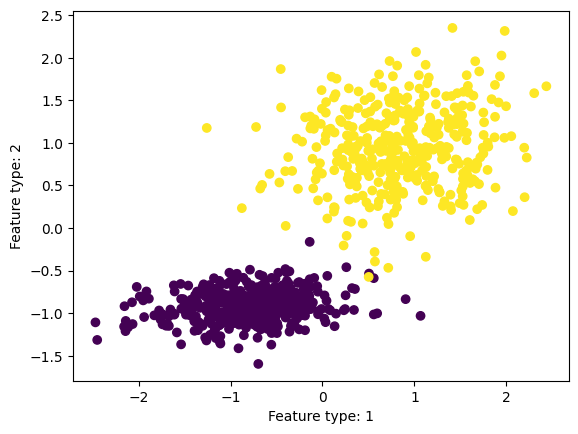

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [21]:
X_test = (X_test - mean)/std

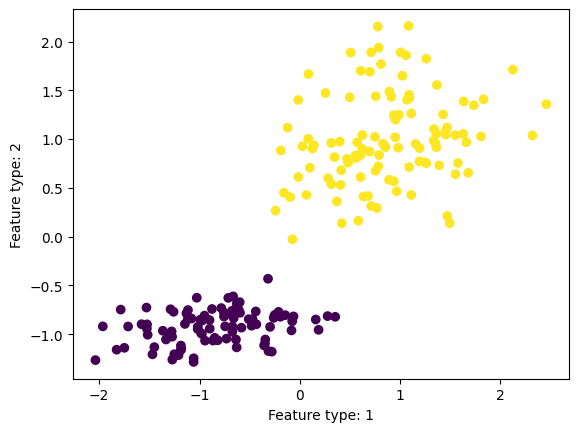

In [23]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [24]:
print(X_train.std())

1.0


In [25]:
def sigmoid(X):
  return 1.0/(1.0 + np.exp(-X))

In [26]:
def hypothesis(X, theta):
  return sigmoid(np.dot(X, theta))

In [27]:
random_values = np.linspace(-300, 300, 20)

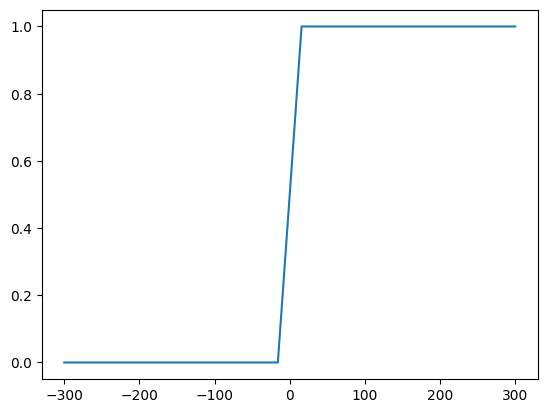

In [28]:
plt.plot(random_values, sigmoid(random_values))

In [29]:
def cost_function(X, Y, theta):
  h_theta = hypothesis(X, theta)
  cost = np.mean(Y*np.log(h_theta) + (1 - Y)*np.log(1-h_theta))
  cost = cost*-1

  return cost

In [30]:
def gradient(X, Y, theta):

  h_theta = hypothesis(X, theta)

  grad = np.dot(X.T, (Y-h_theta))

  return grad/X.shape[0]

In [31]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

  m, n = X.shape
  theta = np.zeros((n, 1))
  cost_epoch = []

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost_function(X, Y, theta)
    cost_epoch.append(e)

    theta = theta + learning_rate*grad

  return (theta, cost_epoch)

In [32]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4, :4], X_train.shape)
Y_train = Y_train.reshape((-1, 1))

[[ 1.          0.54152407  0.44005288]
 [ 1.         -0.63077806 -0.99334489]
 [ 1.         -0.28415016 -0.88320551]
 [ 1.         -0.11866149 -0.92157212]] (800, 3)


In [33]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.1, max_steps = 1000)

In [34]:
theta

array([[0.36916081],
       [2.21362575],
       [3.73653659]])

In [35]:
# cost_epoch

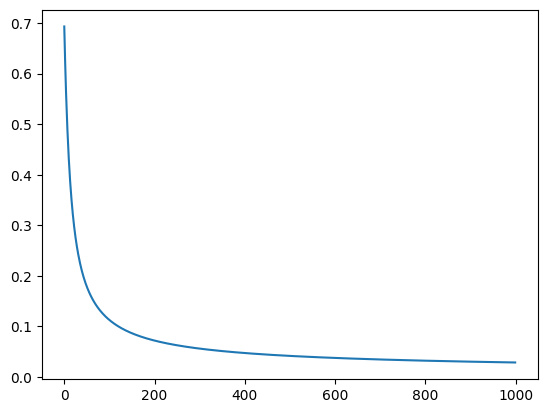

In [36]:
plt.plot(cost_epoch)

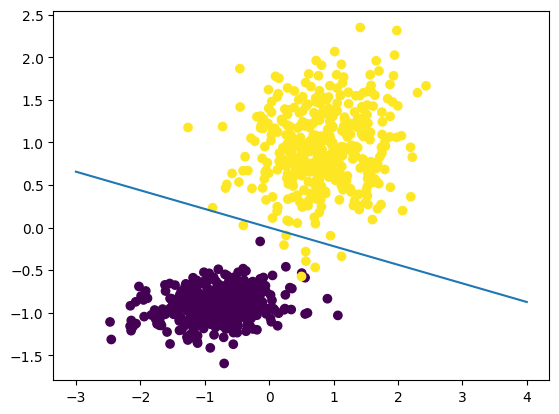

In [38]:
x1 = np.arange(-3, 5)

x2 = -(theta[0] * theta[1]*x1/theta[2])

plt.scatter(X_train[:, 1], X_train[:, 2], c = Y_train)
plt.plot(x1, x2)

In [39]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :4], X_test.shape)
Y_test = Y_test.reshape((-1, 1))

[[1.         0.36918189 0.36108553]
 [1.         0.78330725 0.72154754]
 [1.         1.33442992 0.98367724]
 [1.         2.45820711 1.35792003]] (200, 3)


In [43]:
def predict(X, theta):
  h_theta = hypothesis(X, theta)
  output = np.zeros(h_theta.shape)

  output[h_theta>0.5] = 1
  output = output.astype('int')

  return output

In [44]:
train_preds = predict(X_train, theta)
test_preds = predict(X_test, theta)

In [45]:
for i in range(len(test_preds)):
  print(test_preds[i], Y_test[i])

[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[

In [46]:
def accuracy(preds, labels):
  labels = labels.astype('int')
  print(np.sum(preds == labels)/labels.shape[0])

In [47]:
accuracy(test_preds, Y_test)

1.0


In [48]:
accuracy(train_preds, Y_train)

0.99625


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train, Y_train.reshape((-1, )))

LogisticRegression()

In [52]:
theta_0 = model.intercept_
theta_r = model.coef_

In [53]:
print(theta_0, theta_r)

[0.86855817] [[4.23865847e-07 2.20144223e+00 4.82245220e+00]]


In [54]:
model.score(X_train, Y_train.reshape((-1, )))

0.99875

In [55]:
model.score(X_test, Y_test.reshape((-1, )))

1.0

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.])